Importing Packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading File

In [26]:
# Importing the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [27]:
df.info()
print(df.isnull().sum())
# Checking for null values in the datase


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [28]:
df['smoking_history'].unique()
# Checking unique values in the 'smoking_history' column

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df['smoking_history'] = df['smoking_history'].replace('ever', 'never')
# Fixing the 'ever' value to 'never' for consistency
df['smoking_history'] = df['smoking_history'].replace('not current', 'former')
# Fixing the 'not current' value to 'former' for consistency

df.replace('No Info', np.nan, inplace=True)
#Replacing 'No Info' with NaN for better handling of missing values


df = pd.get_dummies(df, columns=['smoking_history'], dummy_na=False)
#One-hot encoding the 'smoking_history' column

KeyError: 'smoking_history'

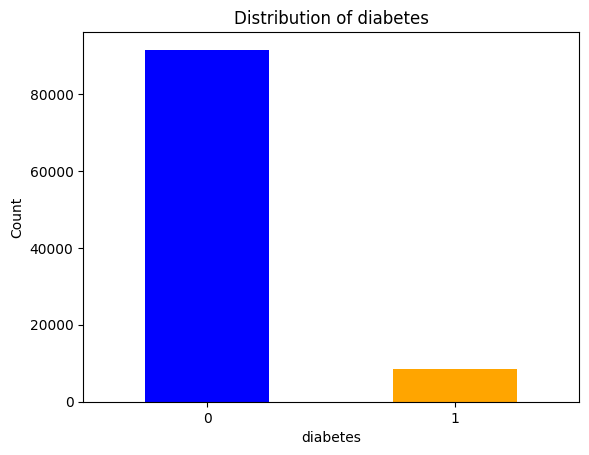

In [32]:
bar_chart = df['diabetes'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribution of diabetes')
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
# Plotting the distribution of the 'diabetes' column using a bar chart

We see a imbalanced dataset which we will need to take into account during model training 

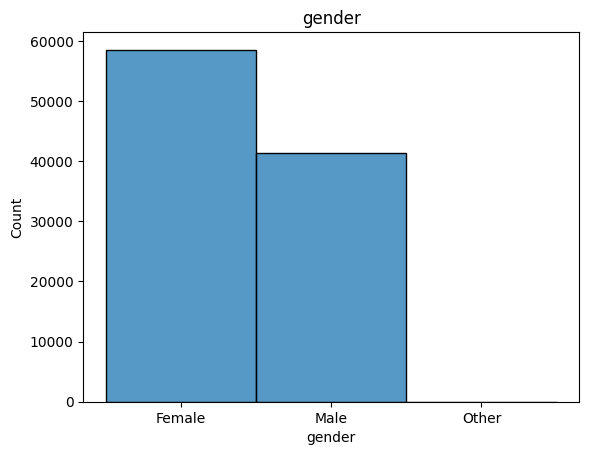

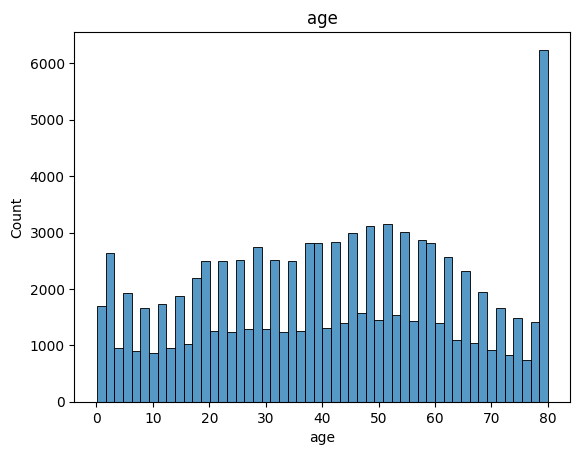

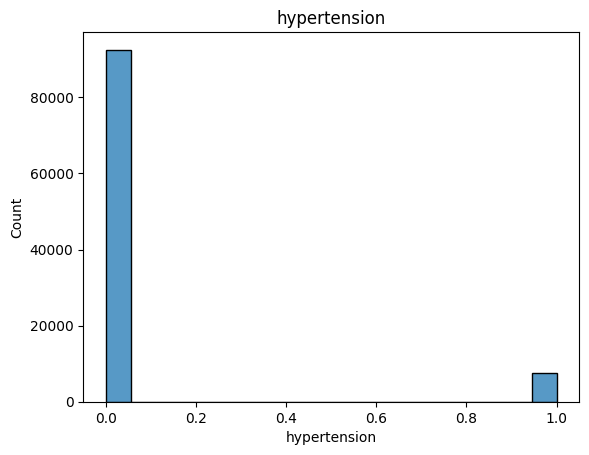

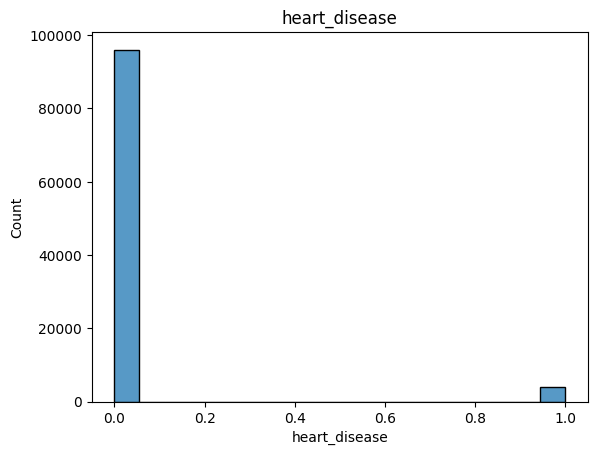

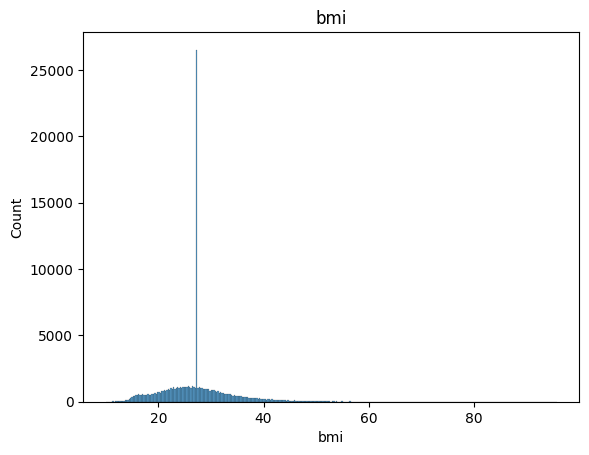

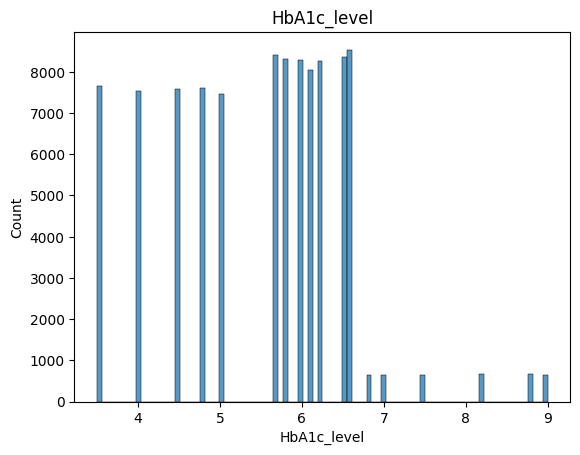

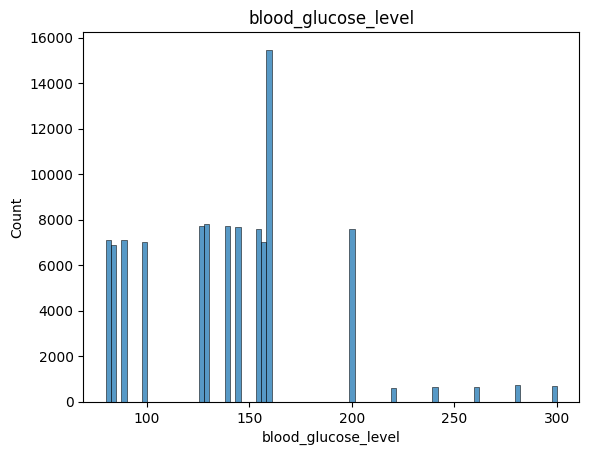

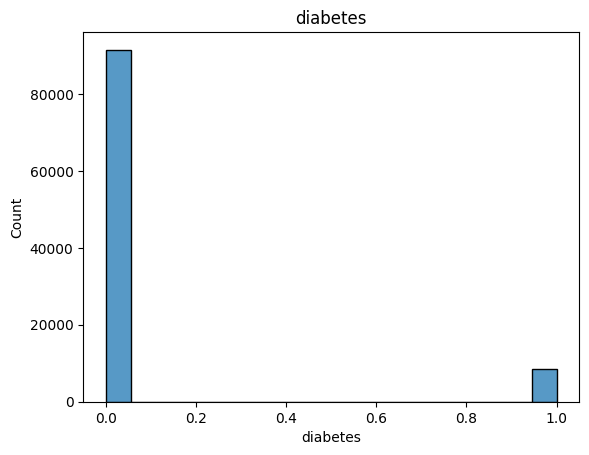

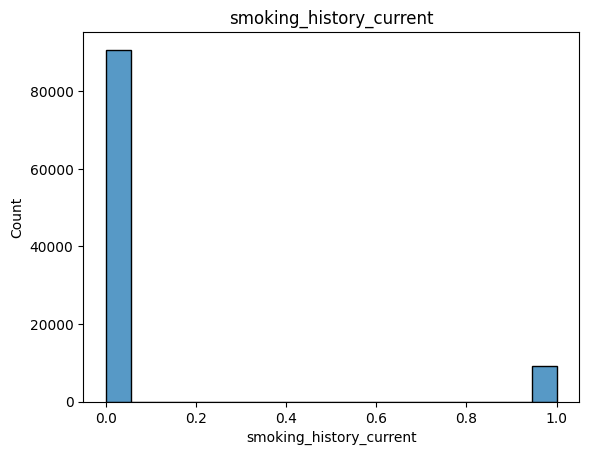

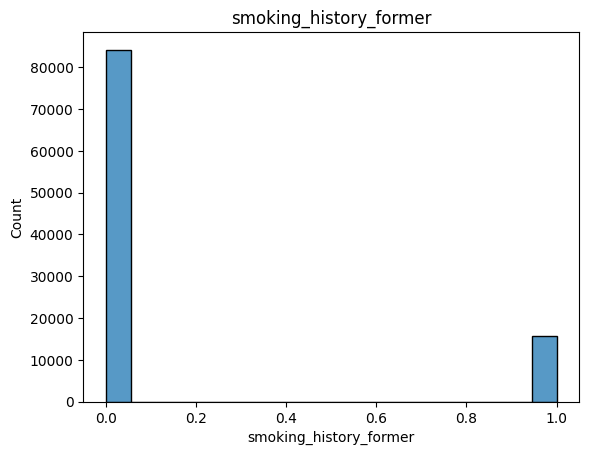

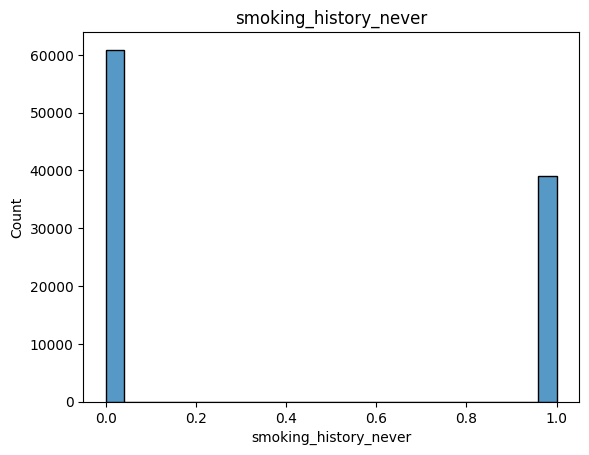

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns[:]:  
    plt.figure()
    sns.histplot(df[col], kde=False)
    plt.title(col)
    
# Plotting histograms for each feature in the dataset

There seems to be an outlier in the 'bmi' column. We will check this outlier

In [50]:
# Get value counts sorted by frequency
value_counts = df['bmi'].value_counts()

# First mode and its count
first_mode = value_counts.index[0]
first_mode_count = value_counts.iloc[0]

# Second mode and its count (check length to avoid error)
if len(value_counts) > 1:
    second_mode = value_counts.index[1]
    second_mode_count = value_counts.iloc[1]
else:
    second_mode = None
    second_mode_count = 0

# Print results
print("First mode:", first_mode)
print("First mode count:", first_mode_count)
print("Second mode:", second_mode)
print("Second mode count:", second_mode_count)


First mode: 27.32
First mode count: 25495
Second mode: 23.0
Second mode count: 103


In real world applications, we could ask/investigate why 27.32 appears so frequently. It could be a consistant rounding error or a default value when no value is recorded.

We will add a special column for when bmi = 27.32 was recorded so the model can learn if this carries information as an outlier 

In [52]:
df['bmi_was_27_32'] = (df['bmi'] == 27.32).astype(int)

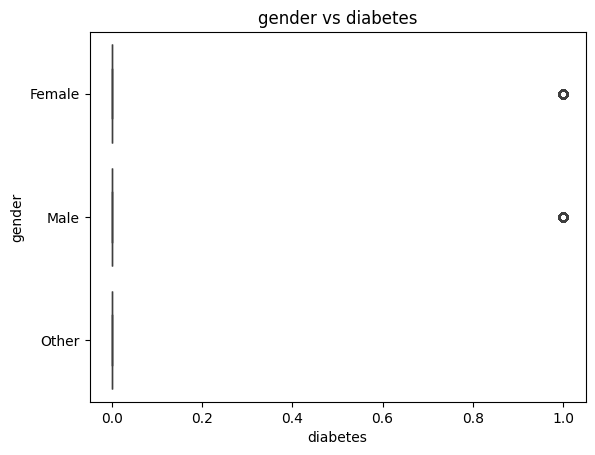

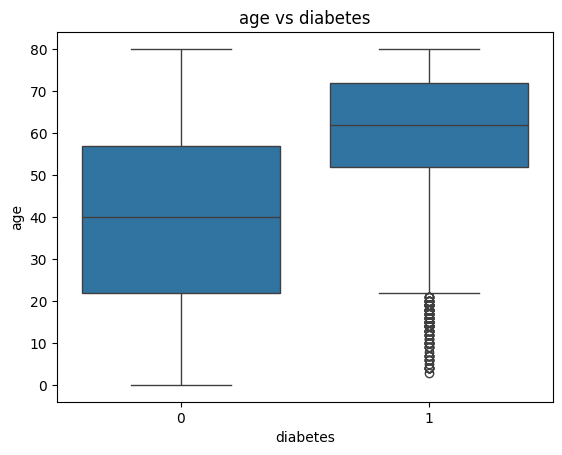

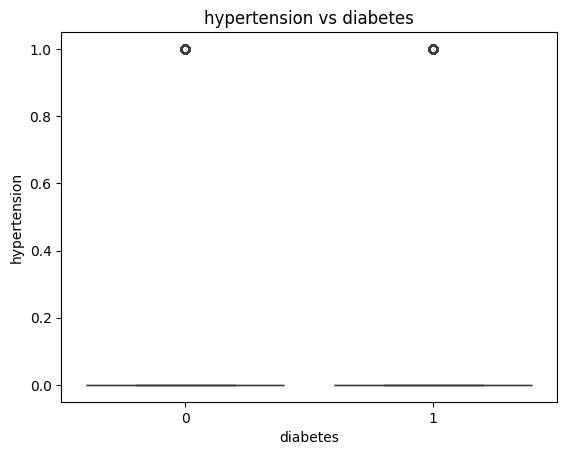

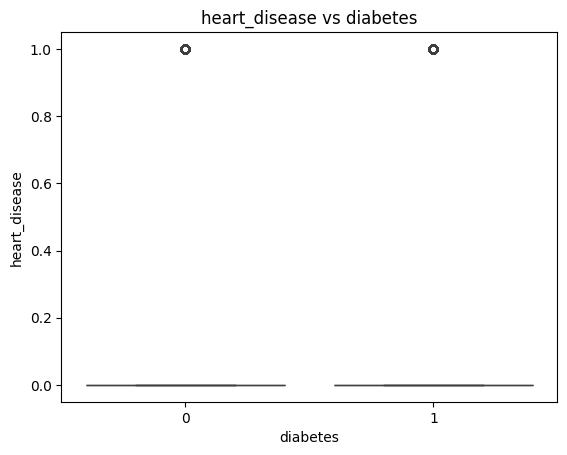

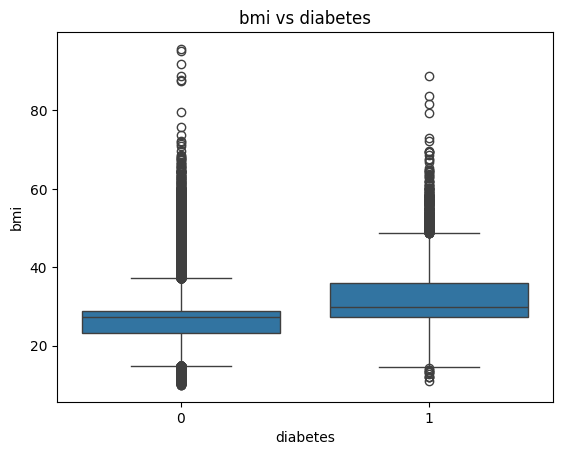

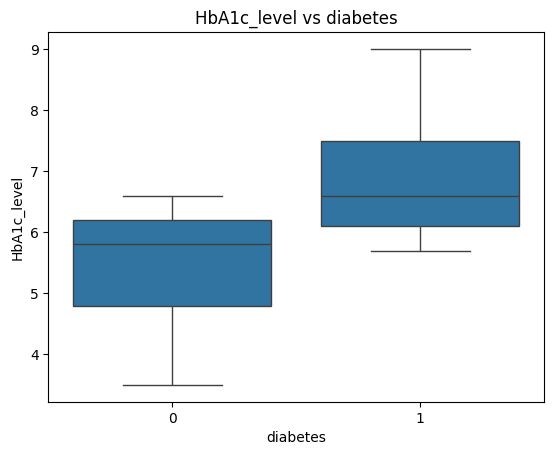

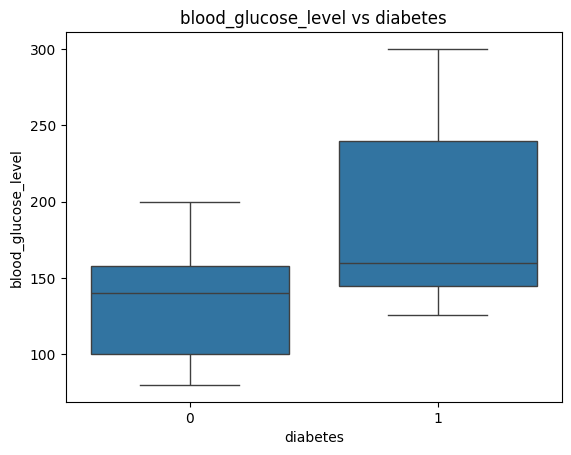

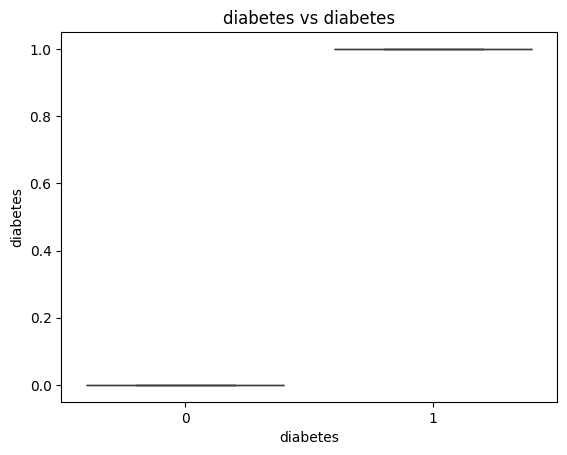

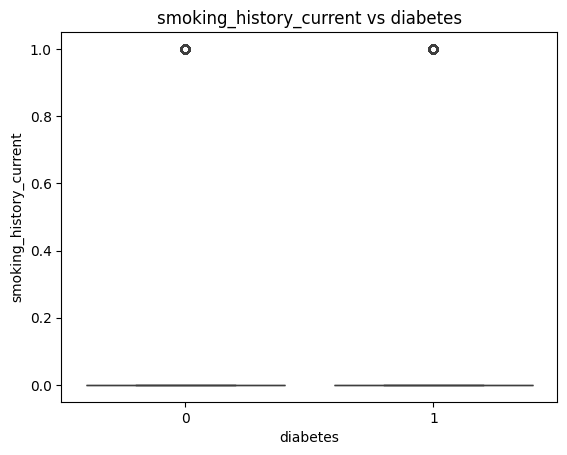

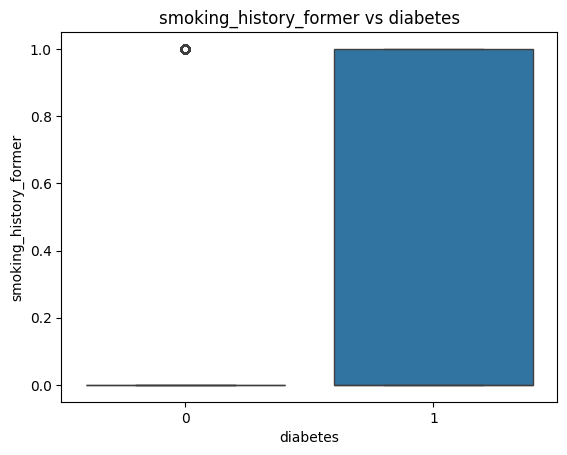

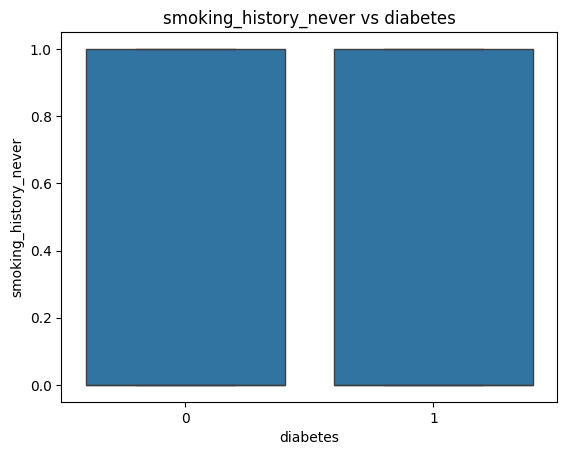

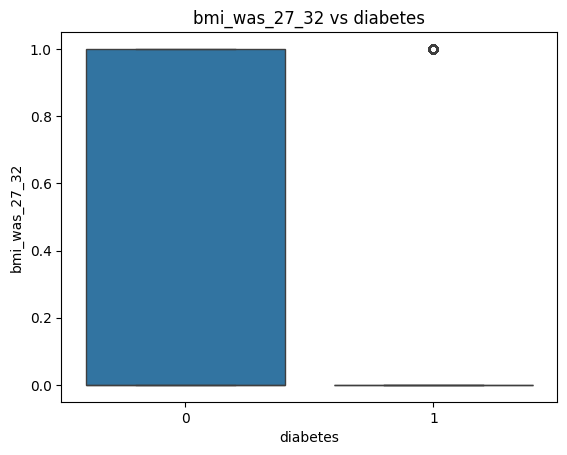

In [53]:
for col in df.columns[:]:
    plt.figure()
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f'{col} vs diabetes')
    
# Plotting boxplots for each feature against the 'diabetes' column

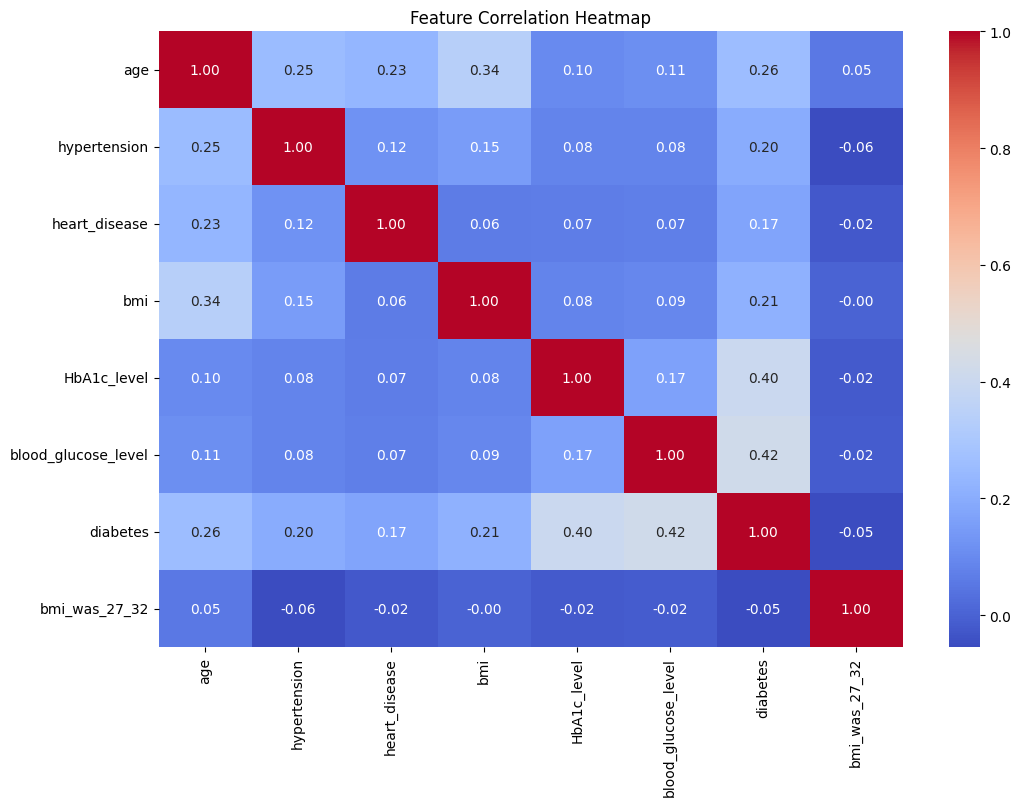

In [ ]:
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Plotting the correlation heatmap to visualize relationships between numeric features

In [56]:
corr_matrix = df.corr(numeric_only=True)

# Extract correlation with diabetes
diabetes_corr = corr_matrix['diabetes'].drop('diabetes')

# Sort by absolute correlation
ranked_corr = diabetes_corr.reindex(diabetes_corr.abs().sort_values(ascending=False).index)

# Display
print("Correlation of features with diabetes:\n")
print(ranked_corr)

Correlation of features with diabetes:

blood_glucose_level        0.419558
HbA1c_level                0.400660
age                        0.258008
bmi                        0.214357
hypertension               0.197823
heart_disease              0.171727
smoking_history_former     0.092127
bmi_was_27_32             -0.052332
smoking_history_never      0.036343
smoking_history_current    0.019606
Name: diabetes, dtype: float64


This ranks which features are most correlated with diabetes. This captures linear relationships only

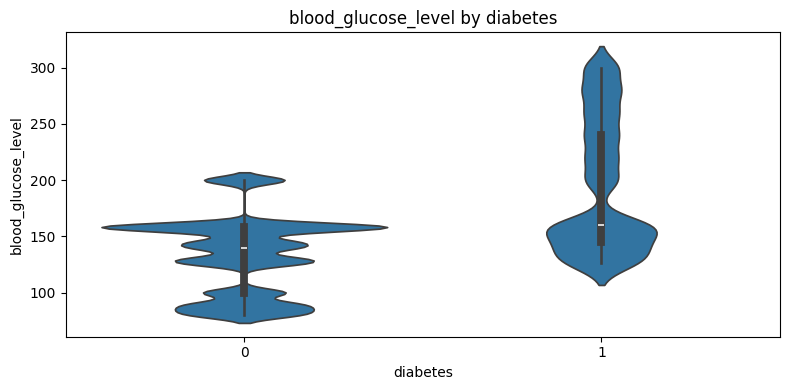

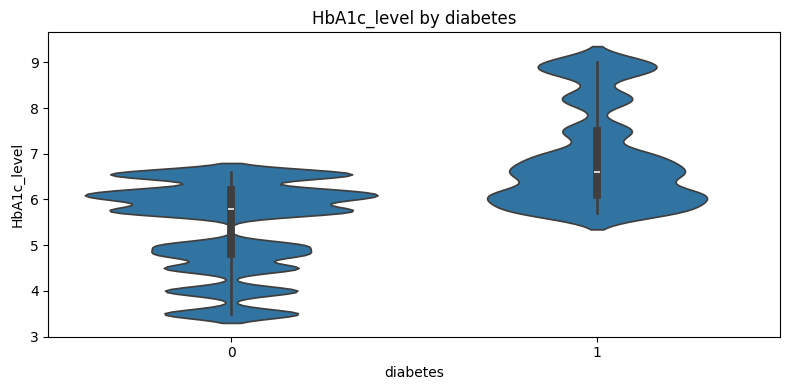

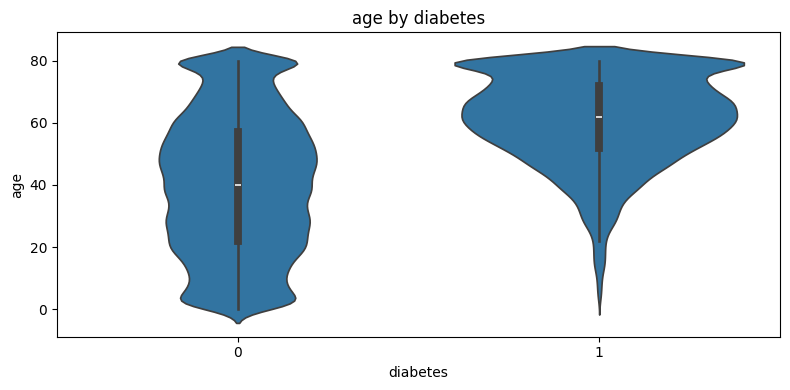

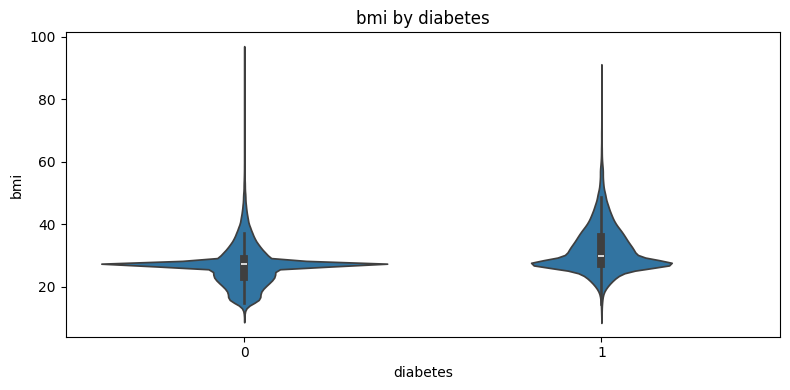

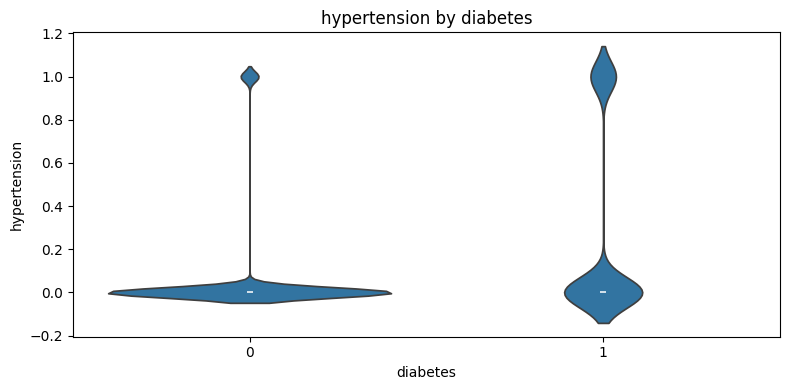

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = ranked_corr.index[:5]  # Top 5 correlated features

for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='diabetes', y=feature, data=df)
    plt.title(f'{feature} by diabetes')
    plt.tight_layout()
    plt.show()
    
# Plotting violin plots for the top 5 features correlated with diabetes

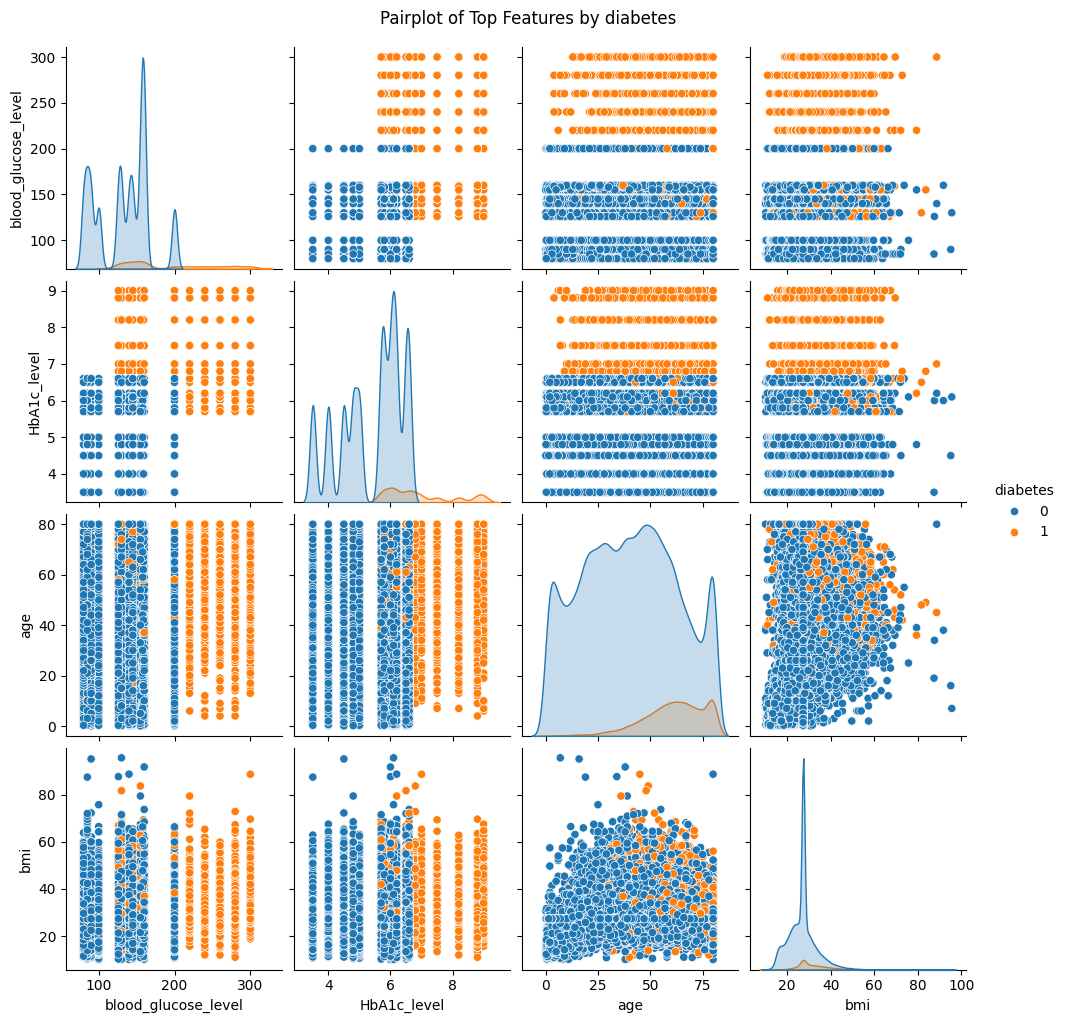

In [ ]:
import seaborn as sns

# Select top 4 features + diabetes for pairplot
pairplot_features = list(ranked_corr.index[:4]) + ['diabetes']

sns.pairplot(df[pairplot_features], hue='diabetes', diag_kind='kde')
plt.suptitle("Pairplot of Top Features by diabetes", y=1.02)
plt.show()

# Plotting a pairplot for the top features correlated with diabetes to visualize relationships and distributions

Mutual Information Scores:
 HbA1c_level                0.130872
blood_glucose_level        0.113652
age                        0.041149
bmi                        0.026134
hypertension               0.014333
heart_disease              0.009590
gender_Male                0.009588
smoking_history_never      0.007839
smoking_history_former     0.005798
bmi_was_27_32              0.004847
gender_Other               0.001368
smoking_history_current    0.001039
dtype: float64


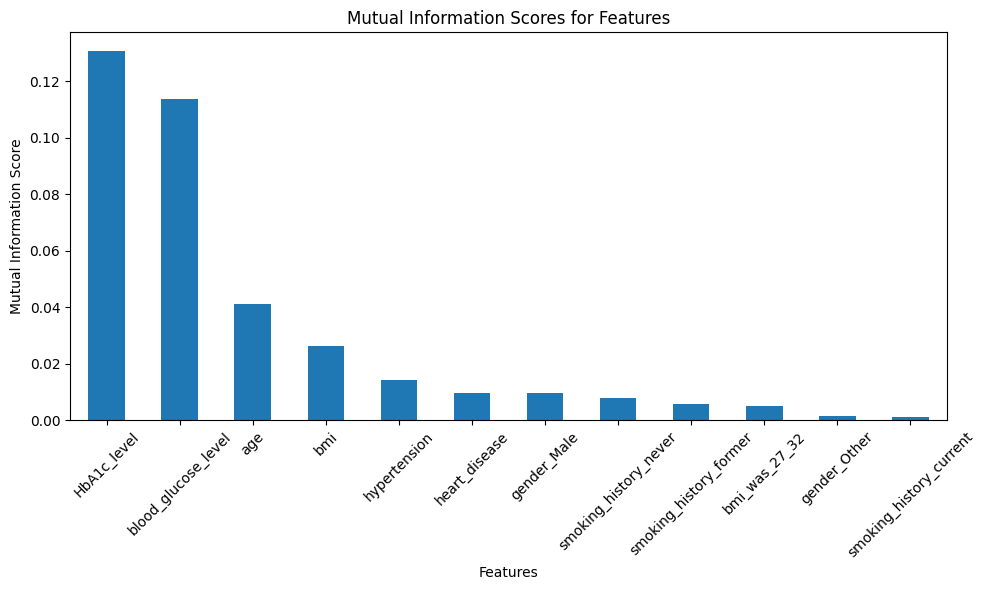

In [61]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Encode categorical variables if needed (e.g., GENDER)
X_encoded = pd.get_dummies(X, drop_first=True)

mi = mutual_info_classif(X_encoded, y, discrete_features='auto')

mi_series = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_series)

# Plotting Mutual Information scores: We can visualize the mutual information scores to understand feature importance
plt.figure(figsize=(10, 6))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores for Features")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mutual information captures any statistical dependancy between variables

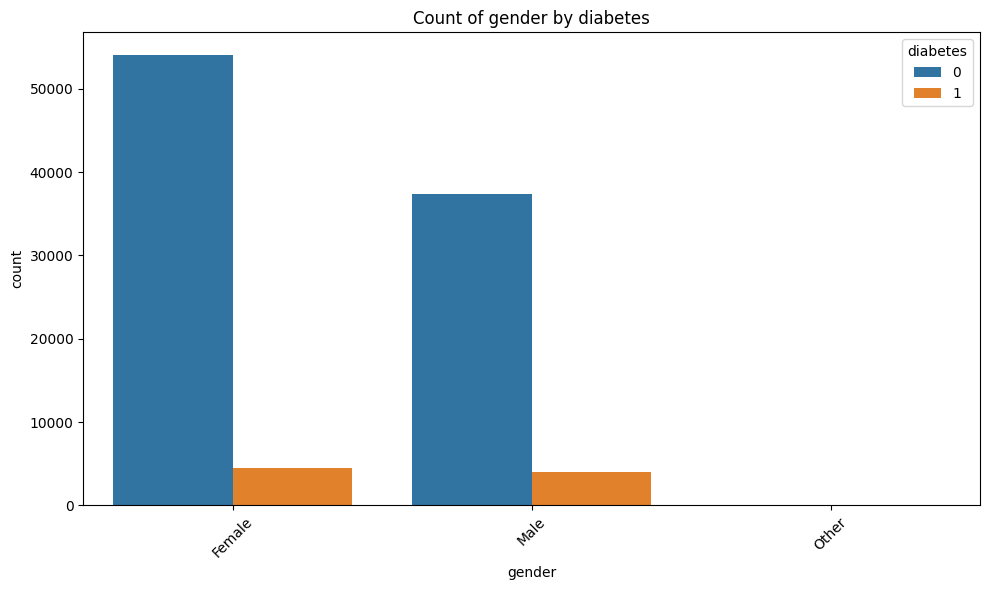

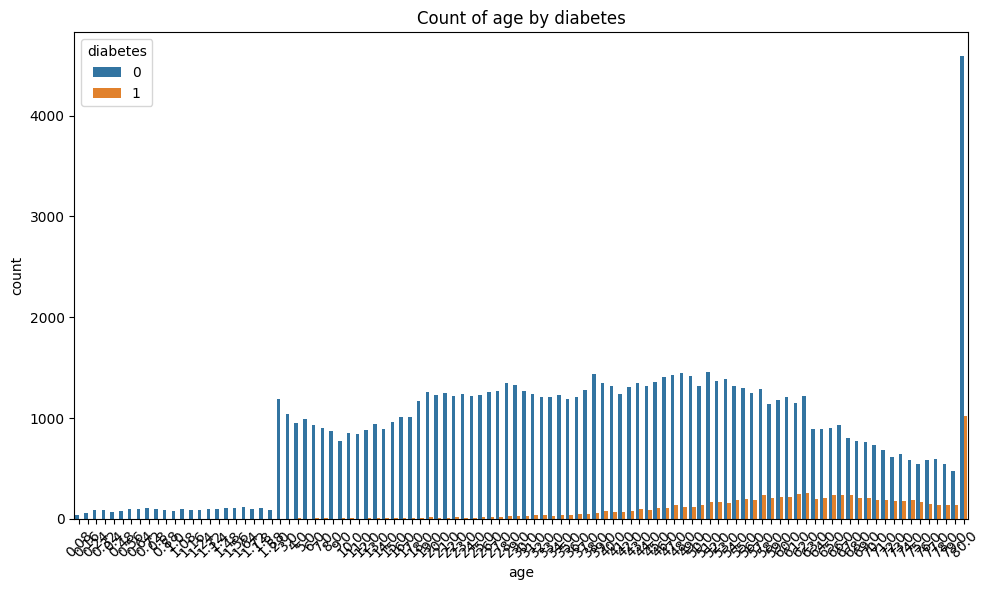

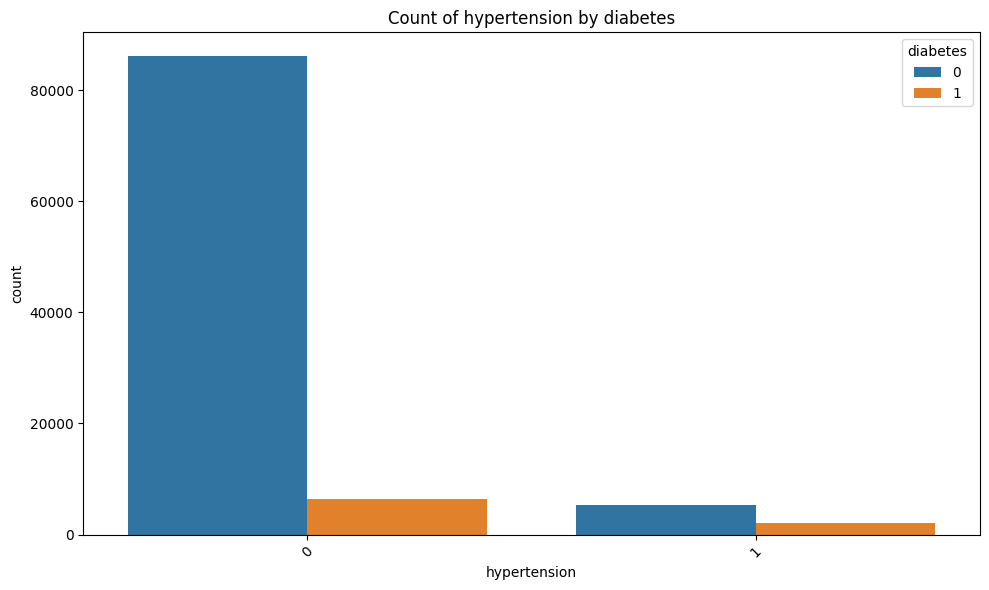

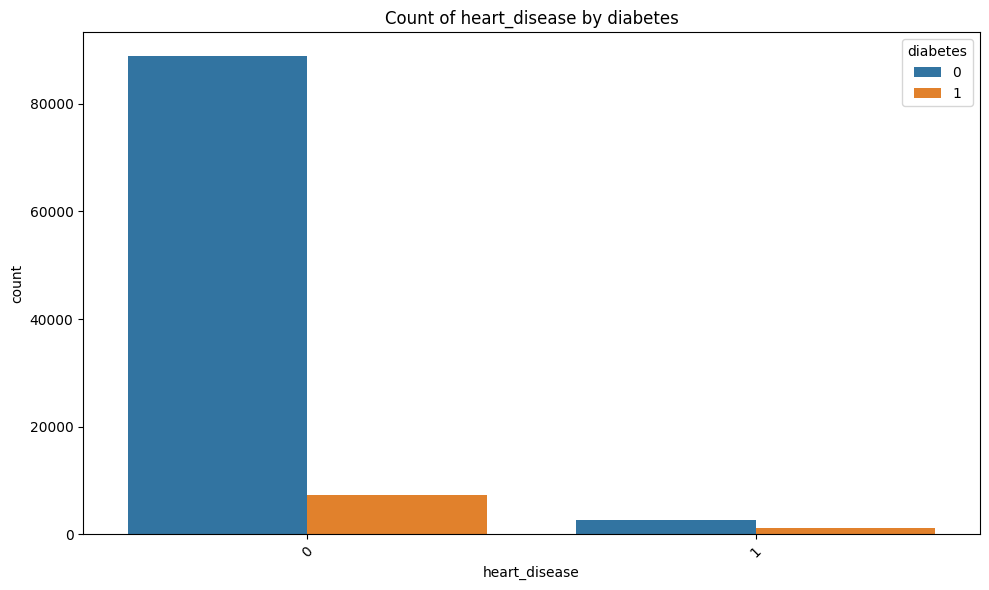

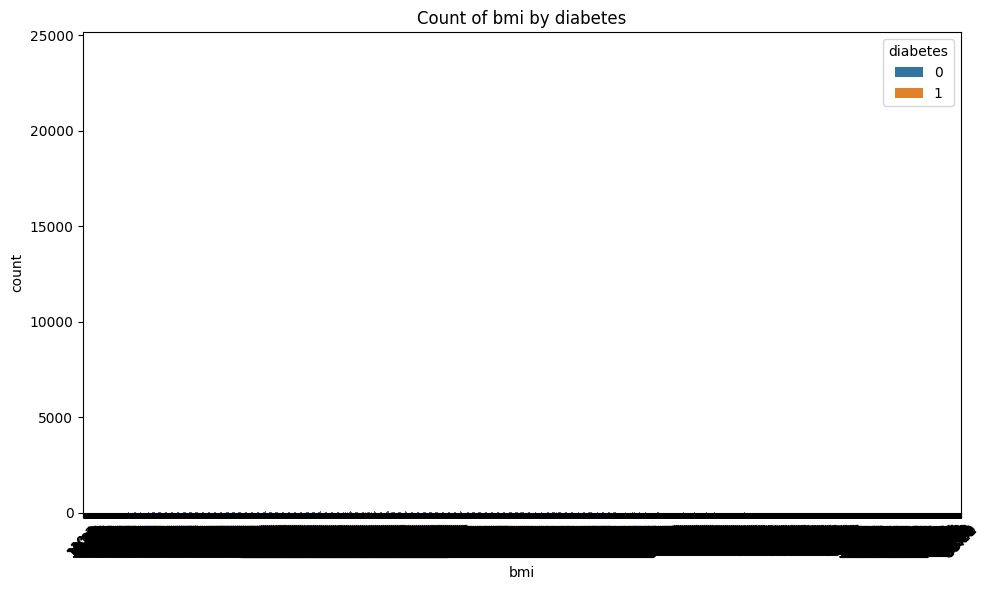

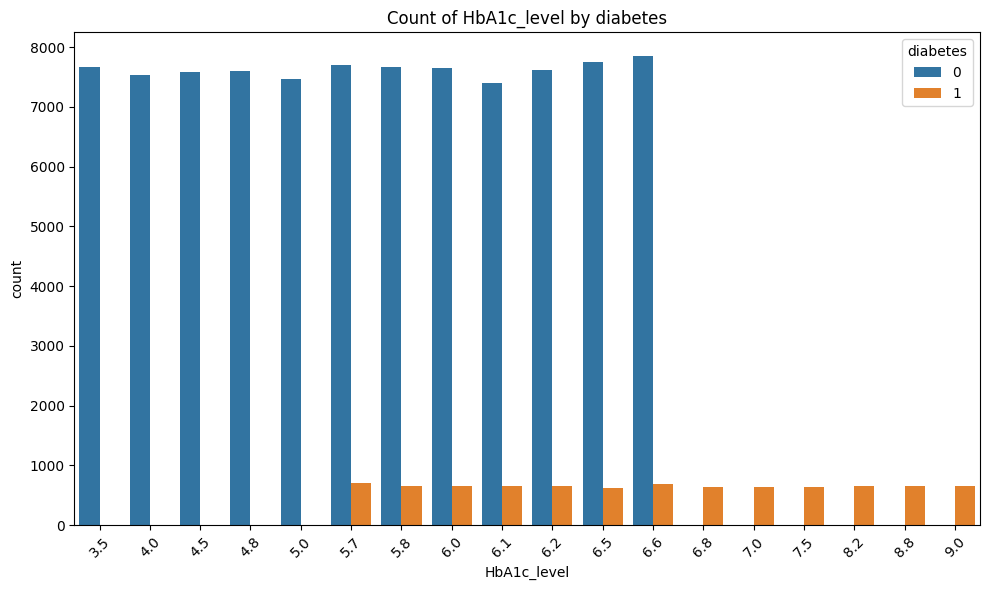

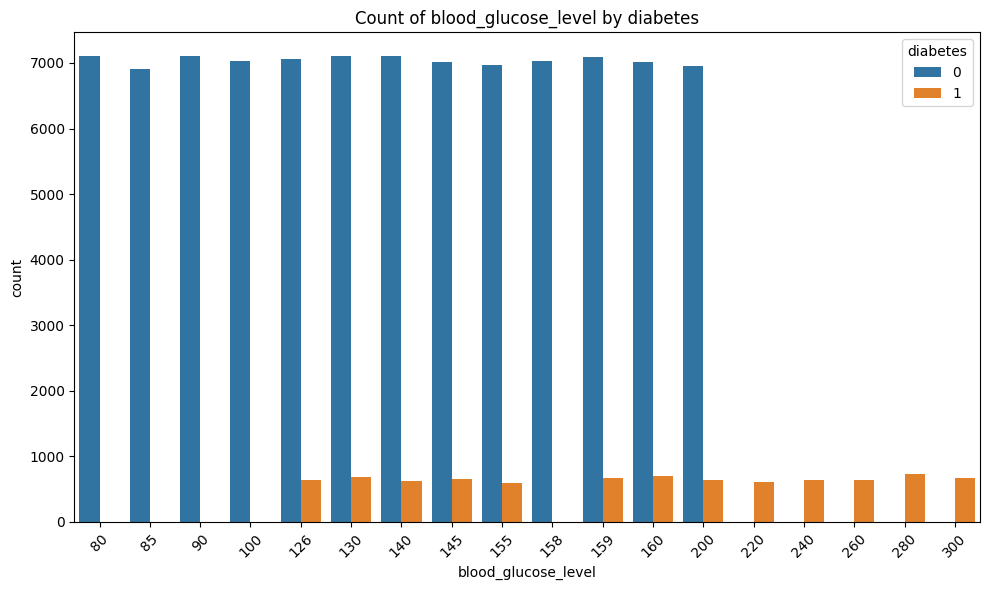

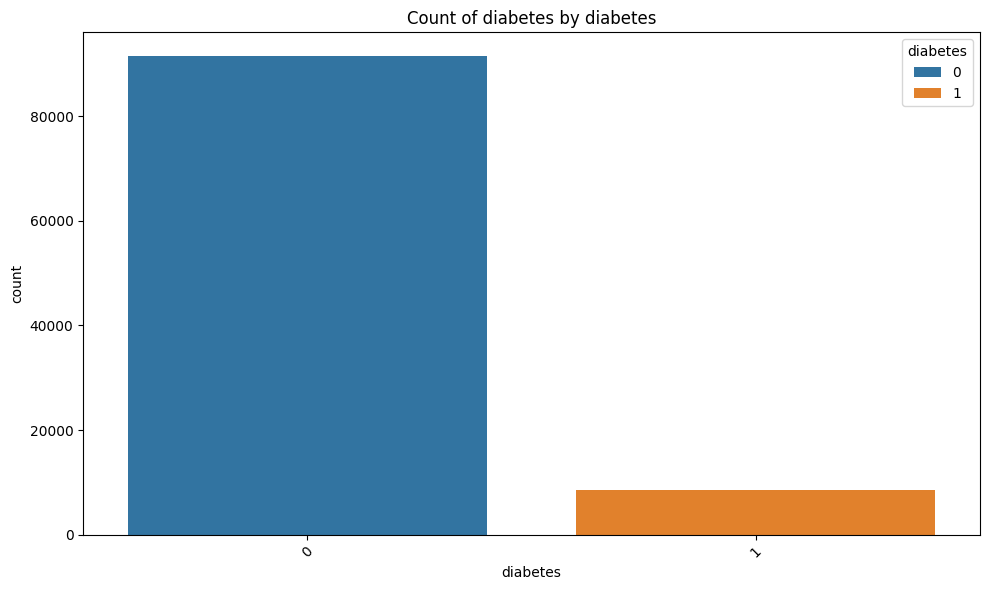

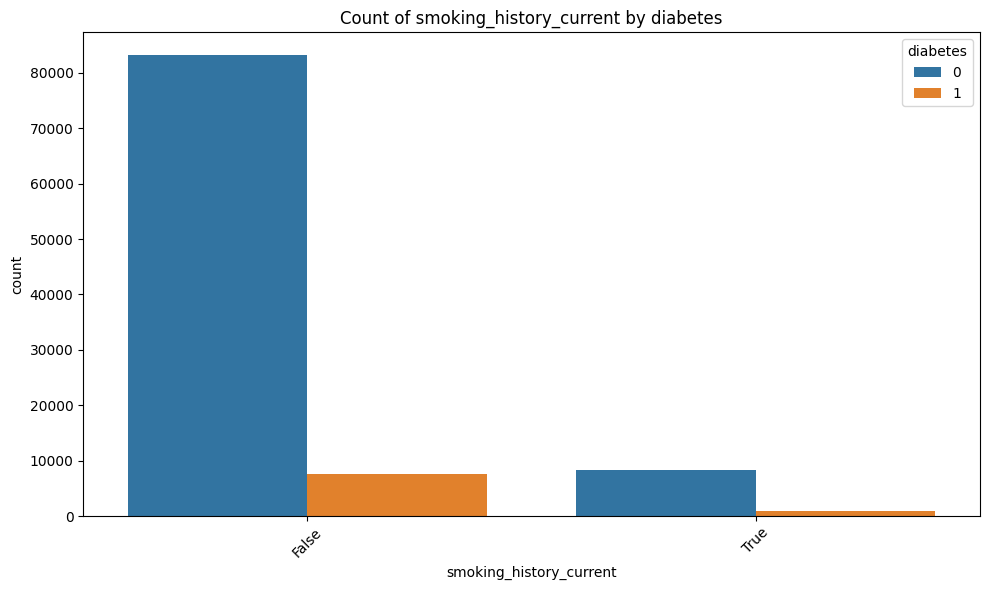

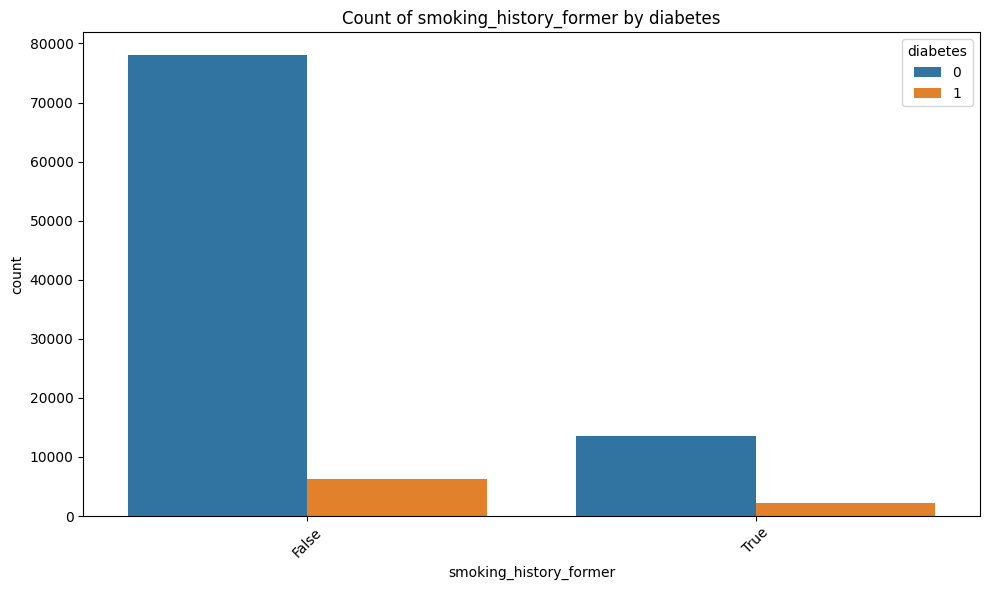

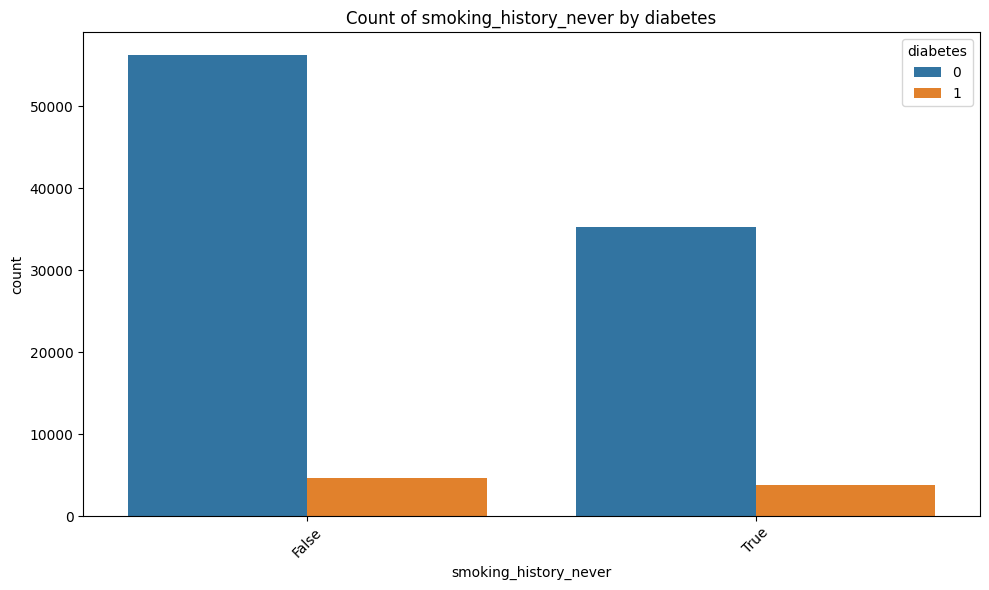

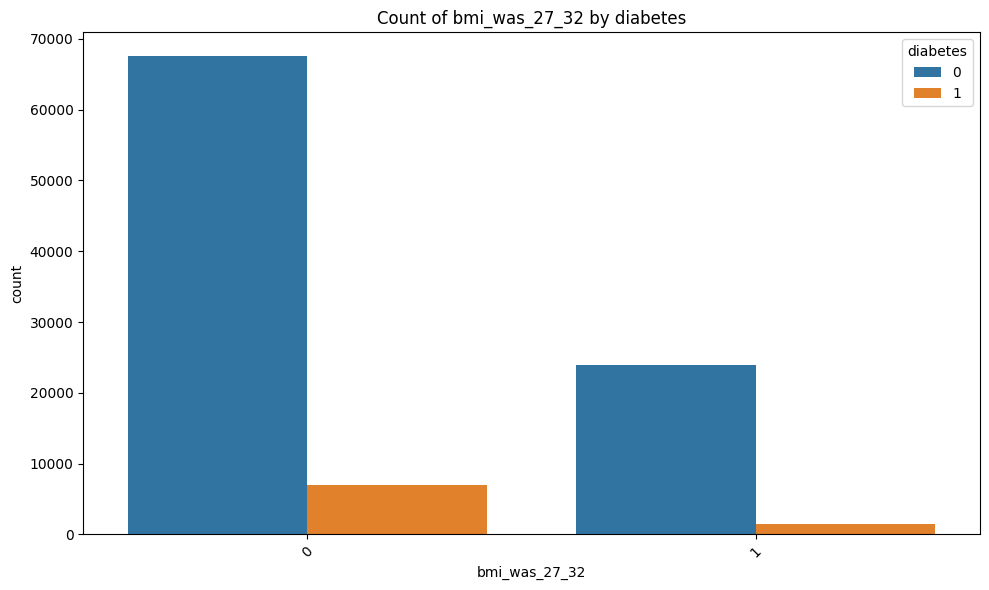

In [ ]:
for col in df.columns[:]:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='diabetes', data=df)
    plt.title(f'Count of {col} by diabetes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
# Plotting count plots for each feature against the 'diabetes' column to visualize distributions across diabetes categories``

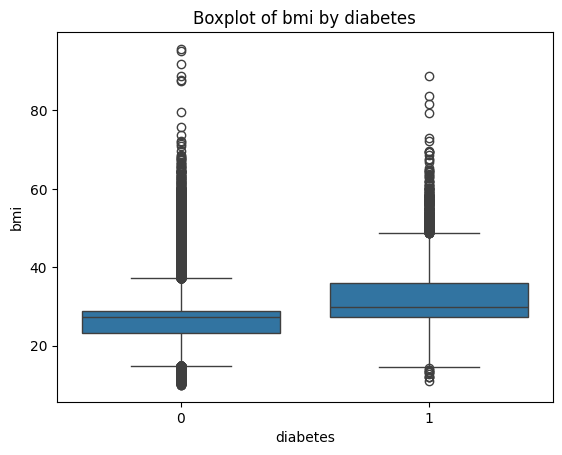

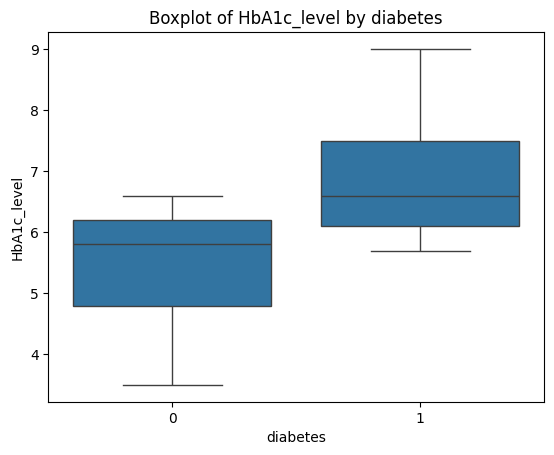

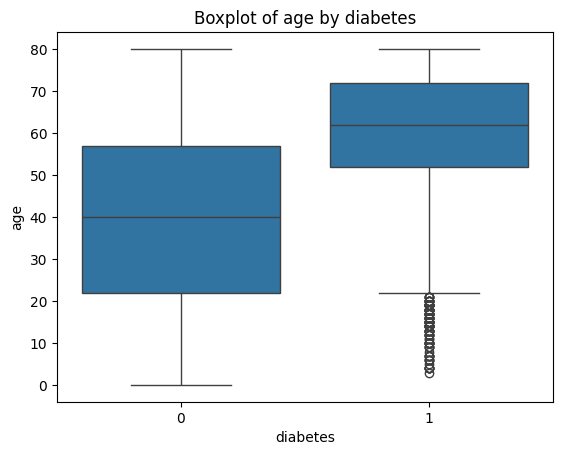

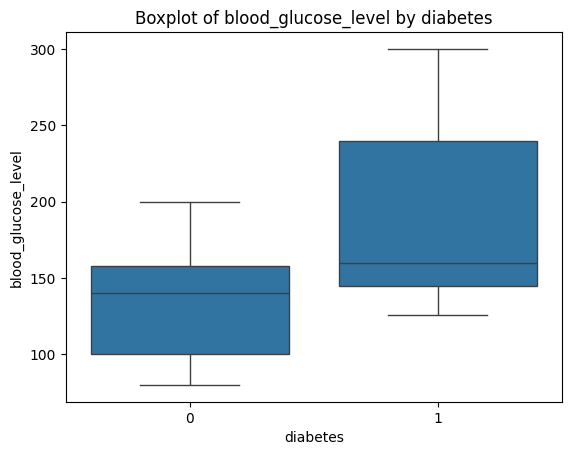

In [ ]:
for col in ['bmi', 'HbA1c_level', 'age', 'blood_glucose_level']:
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f'Boxplot of {col} by diabetes')
    plt.show()
    
# Plotting boxplots for specific features against the 'diabetes' column to visualize distributions and outliers

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


Text(0.5, 1.0, 'PCA of Features Colored by diabetes')

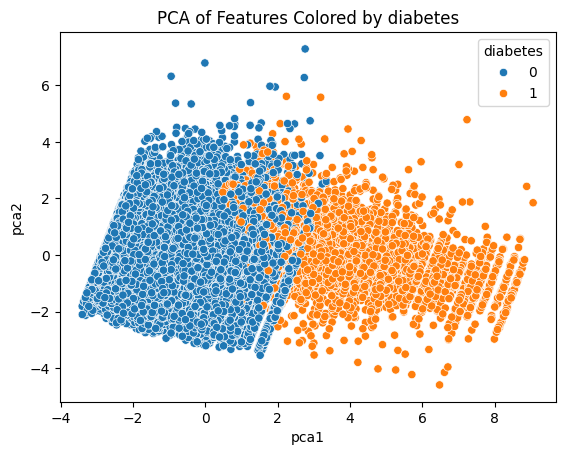

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df['combined1']=df['HbA1c_level']**1.5 * df['blood_glucose_level'] 
# Creating a new feature 'combined1' as a product of HbA1c_level raised to the power of 1.5 and blood_glucose_level

features = ['bmi', 'HbA1c_level', 'age', 'blood_glucose_level','combined1']  # extend as needed
X_scaled = StandardScaler().fit_transform(df[features].dropna())

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['pca1'], df['pca2'] = pca_result[:, 0], pca_result[:, 1]

sns.scatterplot(x='pca1', y='pca2', hue='diabetes', data=df)
plt.title("PCA of Features Colored by diabetes")

# Plotting PCA results to visualize the distribution of features in a reduced dimensional space colored by diabetes categories

The plot above shows that a linear classiffer has a good chance at seperating the target variable.

Text(0.5, 1.0, 'Feature Importance')

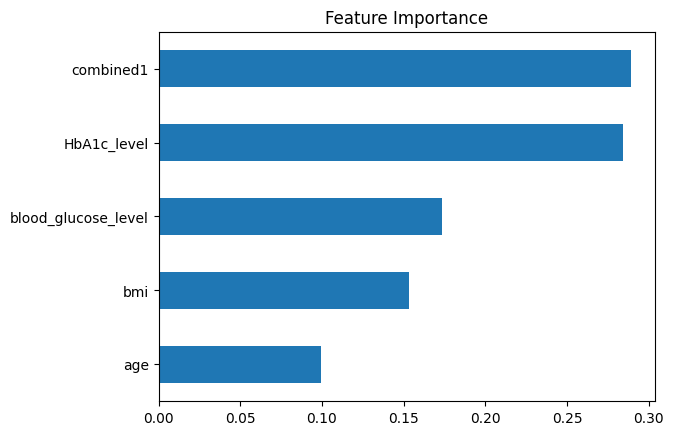

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df[features]
y = df['diabetes']

rf = RandomForestClassifier()
rf.fit(X, y)

feat_imp = pd.Series(rf.feature_importances_, index=features)
feat_imp.sort_values().plot(kind='barh')
plt.title("Feature Importance")

# Plotting feature importance from the Random Forest model to understand which features contribute most to predicting diabetes

<Axes: xlabel='diabetes', ylabel='combined2'>

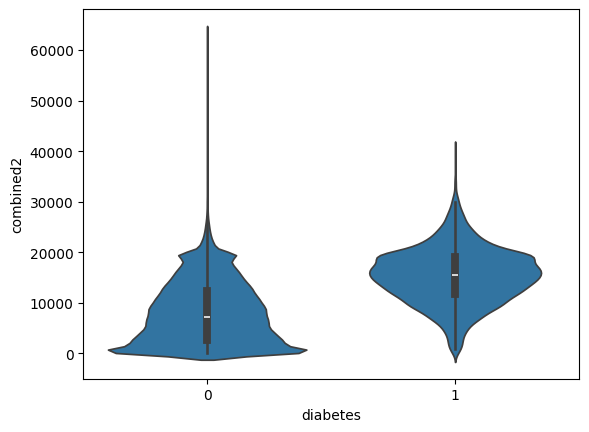

In [ ]:
sns.violinplot(x='diabetes', y='combined2', data=df)
# Plotting a violin plot for the new feature 'combined2' against the 'diabetes' column to visualize distributions across diabetes categories